In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
df = pd.read_csv('/Users/shreyanshsingh/Documents/KAGGLE PROJECTS/Weather Classification/weather_classification_data.csv')
df.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [26]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

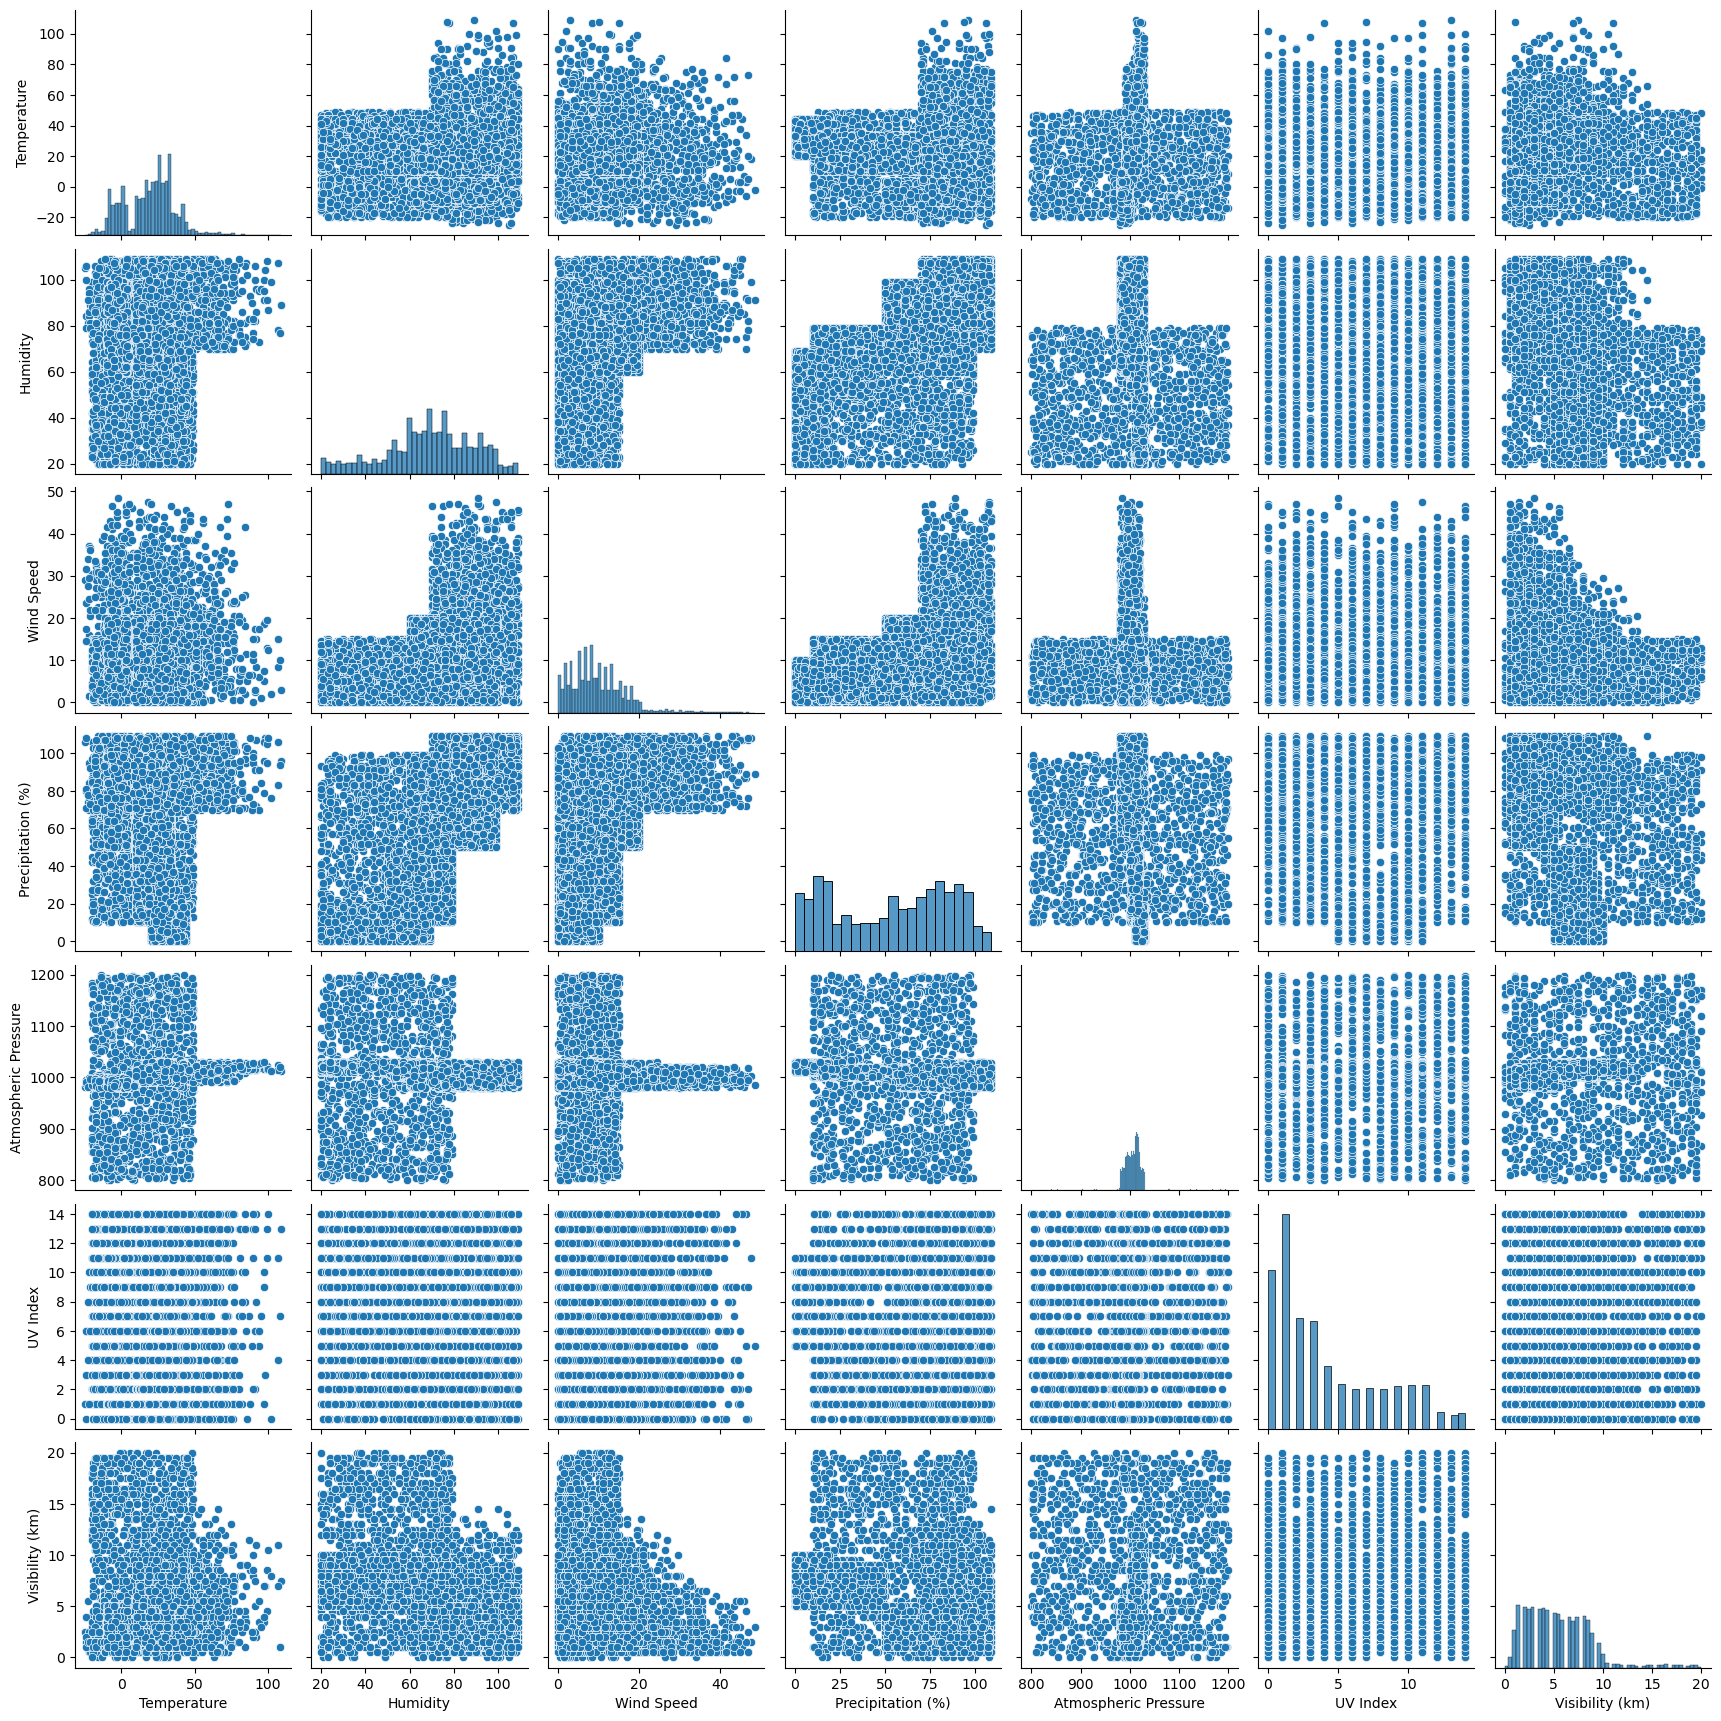

In [28]:
sns.pairplot(df)

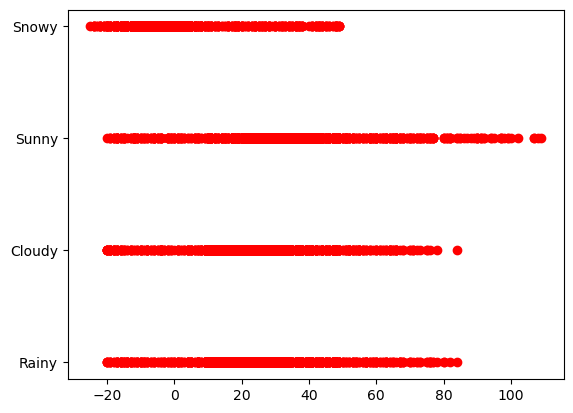

In [29]:
plt.scatter(df['Temperature'],df['Weather Type'],color='r')

In [30]:
for col in df.select_dtypes(include='object').columns:
    categories, _ = pd.factorize(df[col])
    df[col] = categories

In [31]:
correlation_matrix = df.corr()

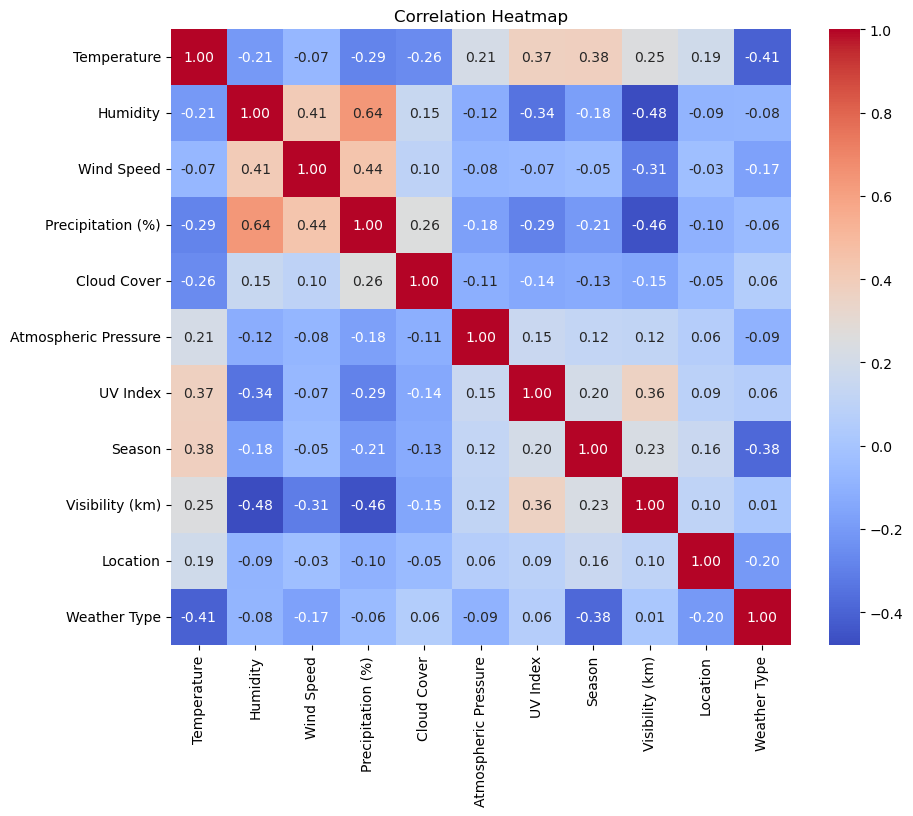

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [33]:

strong_correlation_cols = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['Weather Type', col]) >= 0.05 and col != 'Weather Type']

# Select features (X) and target (y)
X = df[strong_correlation_cols]
y = df['Weather Type']

strong_correlation_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Cloud Cover',
 'Atmospheric Pressure',
 'UV Index',
 'Season',
 'Location']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [36]:
def calculate_accuracies(model, X_train, y_train, X_test, y_test, epochs=10):
    train_accuracies = []
    val_accuracies = []

    for epoch in range(1, epochs + 1):
        # Update only models that support 'n_estimators' (e.g., RandomForestClassifier)
        if hasattr(model, 'n_estimators'):
            model.set_params(n_estimators=epoch * 10)

        # Fit the model
        model.fit(X_train, y_train)

        # Train accuracy
        train_pred = model.predict(X_train)
        train_accuracies.append(accuracy_score(y_train, train_pred))

        # Validation accuracy
        val_pred = model.predict(X_test)
        val_accuracies.append(accuracy_score(y_test, val_pred))

    return train_accuracies, val_accuracies


In [37]:
model1 = RandomForestClassifier(random_state=42, warm_start=True)
train_acc_rf, val_acc_rf = calculate_accuracies(model1, X_train, y_train, X_test, y_test)


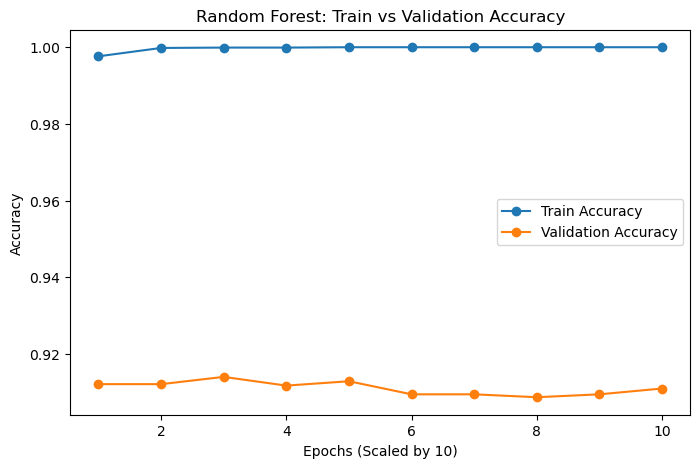

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_acc_rf, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), val_acc_rf, label='Validation Accuracy', marker='o')
plt.title('Random Forest: Train vs Validation Accuracy')
plt.xlabel('Epochs (Scaled by 10)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
model2 = SVC(C=10, random_state=42)
train_acc_svc, val_acc_svc = calculate_accuracies(model2, X_train, y_train, X_test, y_test)


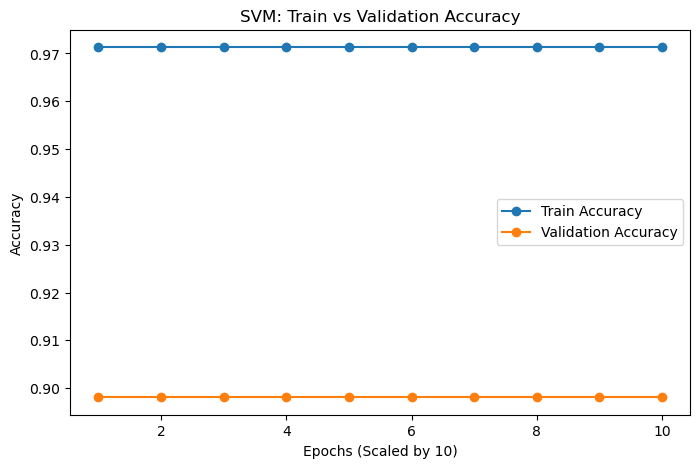

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_acc_svc, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), val_acc_svc, label='Validation Accuracy', marker='o')
plt.title('SVM: Train vs Validation Accuracy')
plt.xlabel('Epochs (Scaled by 10)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
y_pred1 = model1.predict(X_test)

In [51]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print(conf_matrix1)

[[578  47  11  11]
 [ 41 580  15  15]
 [ 19  23 584  15]
 [ 13  17   8 663]]


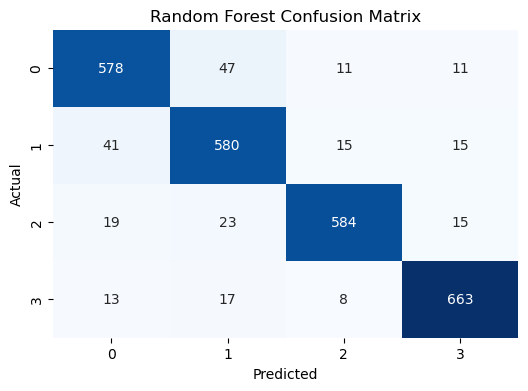

In [54]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
report = classification_report(y_test, y_pred1, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.887865,0.893354,0.890601,647.000000
1,0.869565,0.890937,0.880121,651.000000
2,0.944984,0.911076,0.927720,641.000000
3,0.941761,0.945792,0.943772,701.000000
accuracy,0.910985,0.910985,0.910985,0.910985
macro avg,0.911044,0.910290,0.910554,2640.000000
weighted avg,0.911532,0.910985,0.911148,2640.000000


In [56]:
accuracy = accuracy_score(y_test, y_pred1)*100
accuracy

91.09848484848484

In [57]:
model2 = SVC(C = 10 , random_state=42)
model2.fit(X_train, y_train)

SVC(C=10, random_state=42)

[[565  55  12  15]
 [ 53 566  21  11]
 [ 29  23 573  16]
 [ 15   8  11 667]]


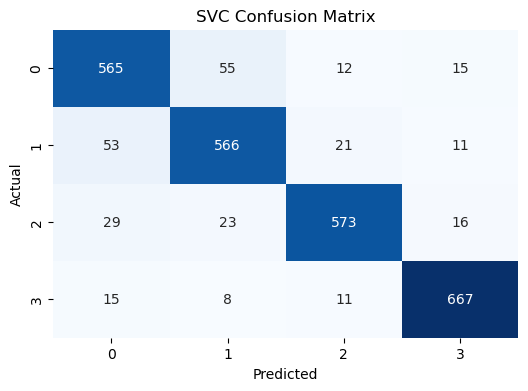

In [58]:
y_pred2 = model2.predict(X_test)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print(conf_matrix2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
y_pred2 = model2.predict(X_test)

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred2)
print(conf_matrix)

[[565  55  12  15]
 [ 53 566  21  11]
 [ 29  23 573  16]
 [ 15   8  11 667]]


In [61]:
report = classification_report(y_test, y_pred2, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.853474,0.873261,0.863254,647.000000
1,0.868098,0.869432,0.868764,651.000000
2,0.928687,0.893916,0.910970,641.000000
3,0.940762,0.951498,0.946099,701.000000
accuracy,0.898106,0.898106,0.898106,0.898106
macro avg,0.897755,0.897027,0.897272,2640.000000
weighted avg,0.898520,0.898106,0.898196,2640.000000


In [62]:
accuracy = accuracy_score(y_test, y_pred2)*100
accuracy

89.81060606060606